# adverSCarial
*adverSCarial* is a list of functions aiming to run adversarial attack on single cell classification algorithms.


# MinChange Attack
In this notebook we present a minChange adversarial attack.
Our objective is to make the smallest alteration possible to the expression of a gene in a group of cells, with the aim of modifying the classification made by the classifier. To minimize the change, we can specify a list of key genes that the function should not alter - in our situation the list of marker genes (cf: 001_R_prepare_data_with_Seurat.ipynb)

# Need for the Attack
1. the adverSCarial library
2. a Seurat object
2. a classifier

In [1]:
# Libraries
library(randomForest)
library(Seurat)
library(stringr)
# Notebook plot sizes
options(repr.plot.width=15, repr.plot.height=12)

# adverSCarial library
source("R/adverscarial.r")
# Seurat object
pbmc = readRDS("data/datasets/pbmc.rds")
# classifier: classifier in rf object
load("classifiers/rf_scrnaseq")

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Attaching SeuratObject



# Look at the pbmc object

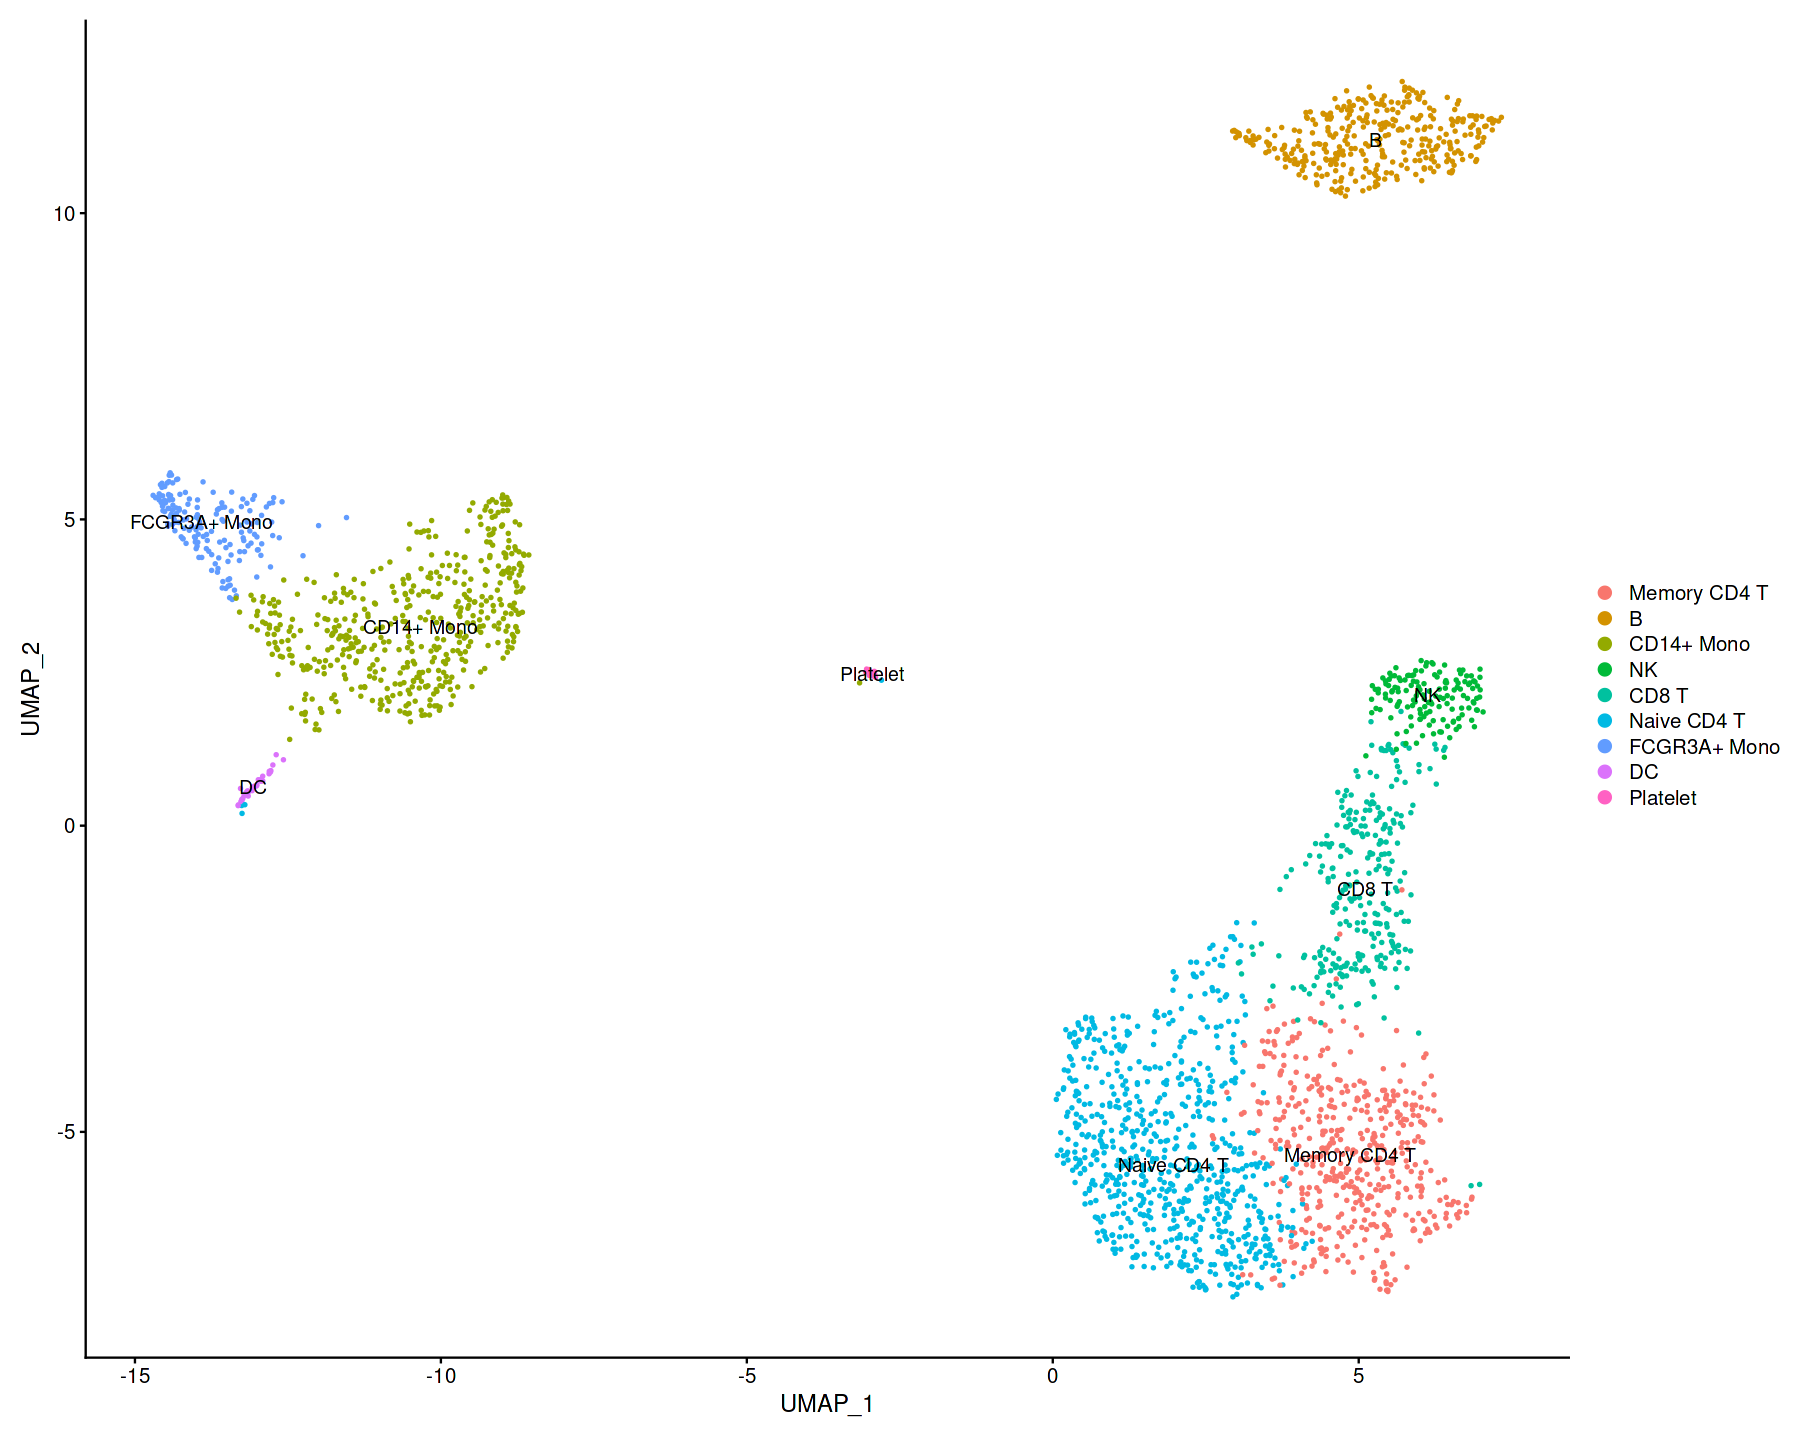

In [2]:
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5)

In [3]:
# Known markers for each cell type
c_markers = c("IL7R", "CCR7", "CD14", "LYZ", "S100A4", "MS4A1", "CD8A", "FCGR3A", "MS4A7",
              "GNLY", "NKG7", "FCER1A", "CST3", "PPBP")


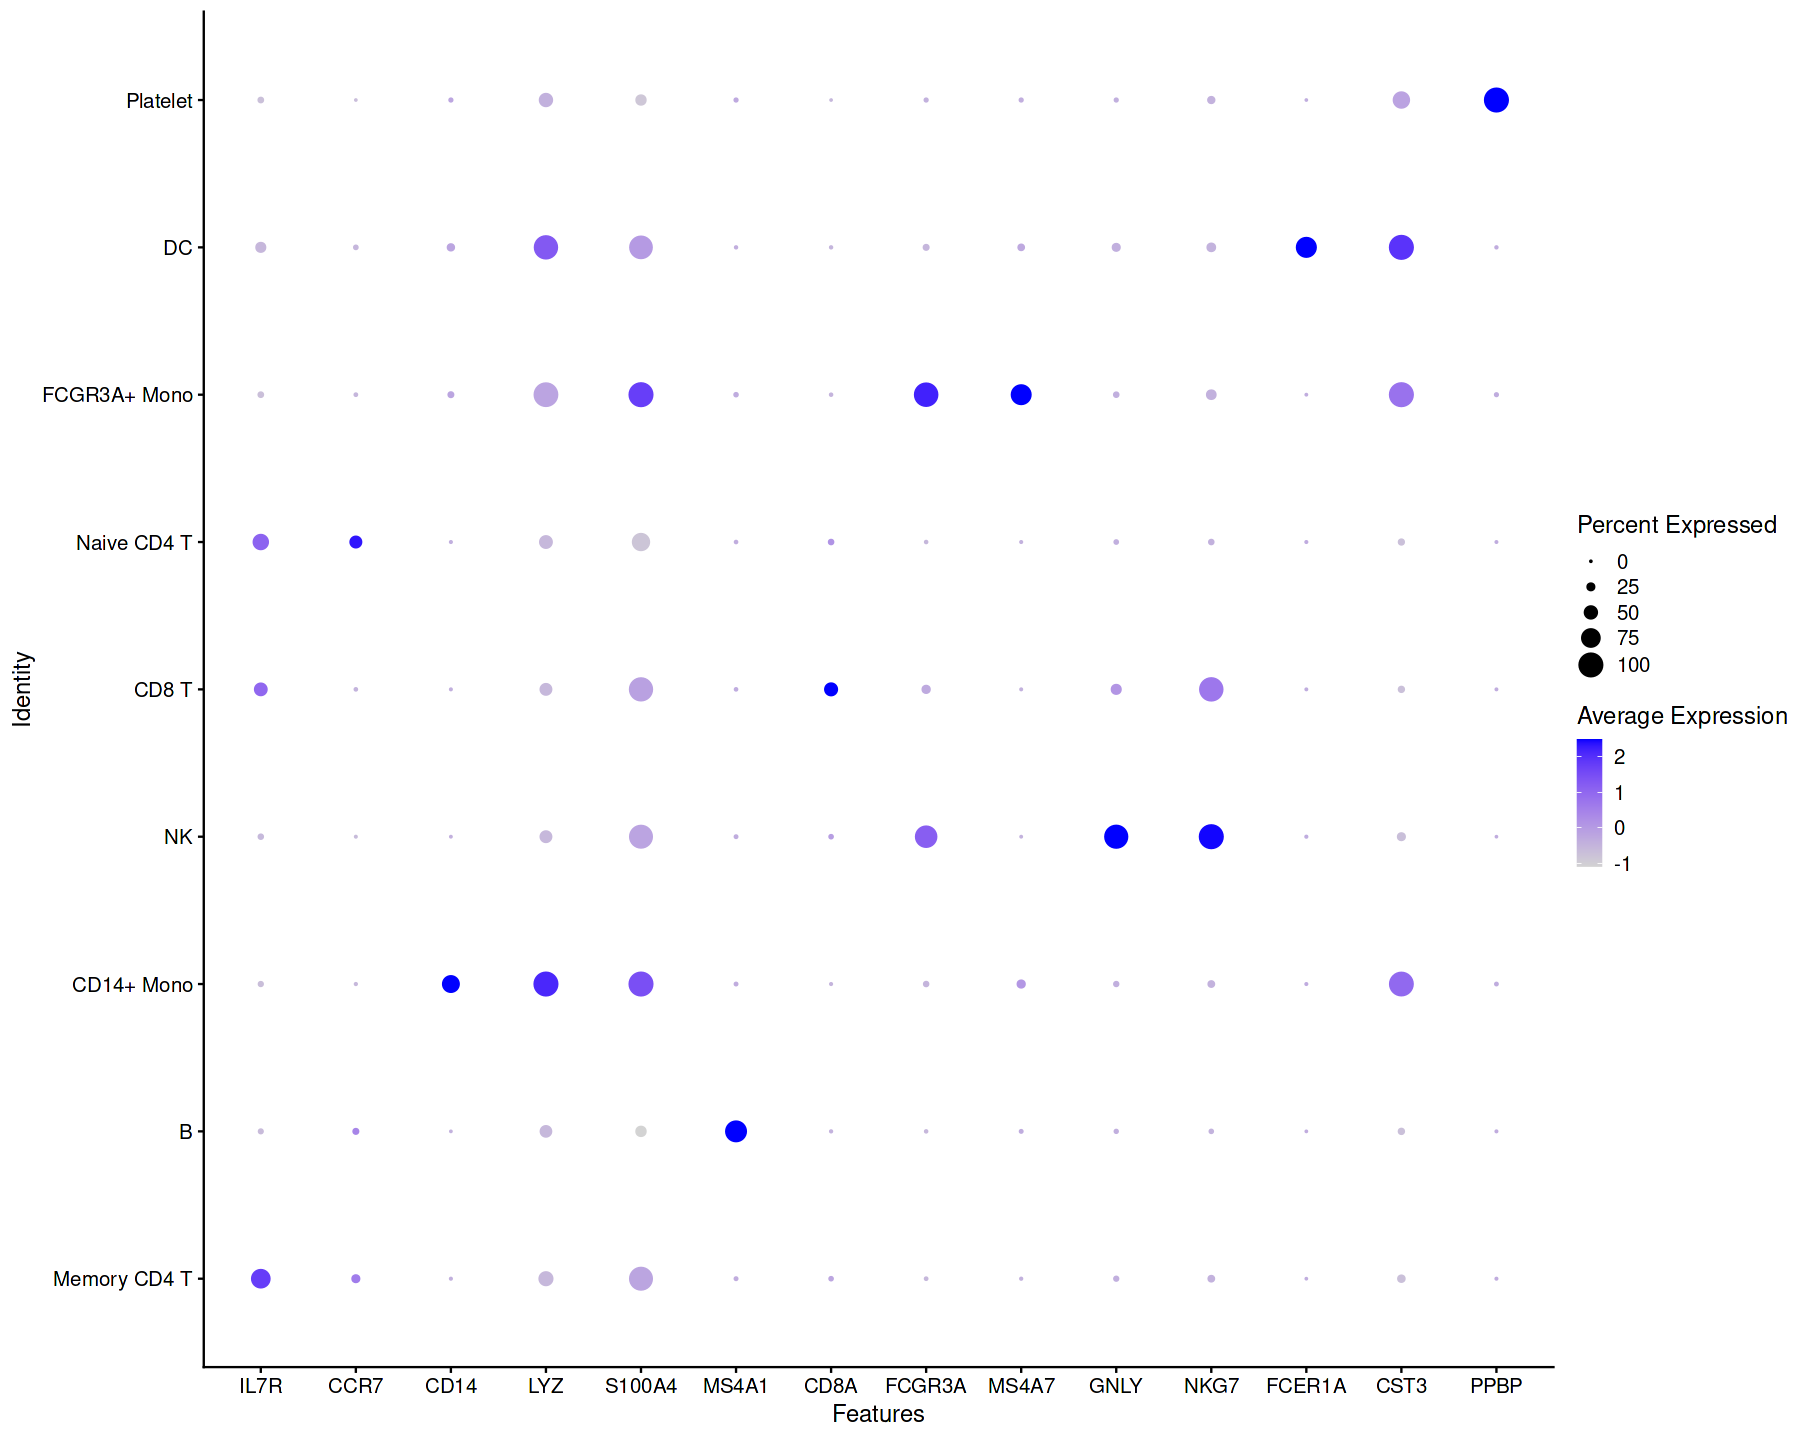

In [4]:
DotPlot(pbmc, features=c_markers)

In [5]:
# Retrieve needed data from pbmc object
rna_matrix = t(as.matrix(pbmc@assays$RNA@counts))
clusters_id = pbmc@meta.data$manual_annotation

# Adapt the classifier

`rf` is a RandomForest classifier that, when given a list of RNA values for a cell, returns a specific cell type from that list. We need to adjust the classifier so that it can assign a cell type to a group of cells.
    
A classifier function has to be formated as follow to be used with *adverSCarial*:
```R
    classifier = function(expr, clusters, target){
                
                
                c("cell type", trust_value)
    }
```
    
The matrix `expr` contains RNA expression values, the list `clusters` consists of the cluster IDs for each cell in `expr`, and `target` is the ID of the cluster for which we want to have a classification. The function returns a vector with the classification result, and a trust indice.

In [6]:
RFClassifier = function(expr, clusters, target){
    set.seed(20)
    colnames(expr) = str_replace_all(colnames(expr),"-","_")
    colnames(expr) = str_replace(colnames(expr),"^","g_")
    
    rf_features = names(rf$forest$xlevels)
    c_diff_genes = setdiff(rf_features, colnames(expr))
    expr = as.data.frame(expr)
    expr[,c_diff_genes] = 0
    
    final_predictions <- predict(rf, expr[clusters==target,])
    ratio = as.numeric(sort(table(final_predictions), decreasing = T)[1]) / sum(as.numeric(sort(table(final_predictions), decreasing = T)))
    predicted_class = names(sort(table(final_predictions), decreasing = T)[1])
    if ( ratio < 0.5){
        predicted_class = "NA"
    }
    c(predicted_class, ratio)
}

# Run the attack on the *DC* cluster

In [8]:
c_max_change = advMaxChange(rna_matrix, clusters_id, "NK", RFClassifier,adv_method="perc99",verbose=T)

genes size: 13714

before predictWithNewValue 1

6857

create mask

modify data

Classifier

CD8 T

0.791666666666667

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

before predictWithNewValue 1

3428

create mask

modify data

Classifier

CD8 T

0.520833333333333

NOT same cell_type 1

genes size: 3428

before predictWithNewValue 1

1714

create mask

modify data

Classifier

CD8 T

0.555555555555556

NOT same cell_type 1

genes size: 1714

before predictWithNewValue 1

857

create mask

modify data

Classifier

CD8 T

0.548611111111111

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

before predictWithNewValue 1

428

create mask

modify data

Classifier

NK

0.6875

same cell_type 1

before predictWithNewValue 2

429

create mask

modify data

Classifier

NK

0.625

same cell_type 2

check if c

27

create mask

modify data

Classifier

NK

0.6875

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 27

before predictWithNewValue 1

13

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

14

create mask

modify data

Classifier

NK

0.6875

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 14

before predictWithNewValue 1

7

create mask

modify data

Classifier

NK

0.6875

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not

Classifier

NK

0.680555555555556

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

before predictWithNewValue 2

2

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

27

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

214

create mask

modify data

Classifier

NK

0.597222222222222

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 214

before predictWithNewValue 1

107

create mask

modify data

Classifier

NK

0.680555555555556

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classif

create mask

modify data

Classifier

NK

0.680555555555556

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 7

before predictWithNewValue 1

3

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

4

create mask

modify data

Classifier

NK

0.680555555555556

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 4

before predictWithNewValue 1

2

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

2

create mask

mod

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

1

create mask

modify data

Classifier

NK

0.694444444444444

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

before predictWithNewValue 2

2

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

7

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

215

create mask

modify data

Classifier

NK

0.666666666666667

same cell_type 2

check if concat lists still gives tar

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 7

before predictWithNewValue 1

3

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

4

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 4

before predictWithNewValue 1

2

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 2

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier



same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

14

create mask

modify data

Classifier

NK

0.625

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 14

before predictWithNewValue 1

7

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

7

create mask

modify data

Classifier

NK

0.625

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 7

before predictWithNewValue 1

3

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat list

modify data

Classifier

YES: merge results

before predictWithNewValue 2

7

create mask

modify data

Classifier

NK

0.6875

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 7

before predictWithNewValue 1

3

create mask

modify data

Classifier

NK

0.6875

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

2

create mask

modify data

Classifier

NK

0.6875

same cell_type 2



create mask

modify data

Classifier

NO: split and retry

genes size: 54

before predictWithNewValue 1

27

create mask

modify data

Classifier

NK

0.715277777777778

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 27

before predictWithNewValue 1

13

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

14

create mask

modify data

Classifier

NK

0.715277777777778

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 14

before predictWithNewValue 1

7

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives ta

YES: merge results

before predictWithNewValue 2

2

create mask

modify data

Classifier

NK

0.680555555555556

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 2

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.680555555555556

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

before predictWithNewValue 2

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

7

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

14

create mask

modify data

Classifier

NK

0.6875

same cell_type 2

check if conc

create mask

modify data

Classifier

NO: split and retry

genes size: 4

before predictWithNewValue 1

2

create mask

modify data

Classifier

NK

0.541666666666667

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 2

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

1

create mask

modify data

Classifier

NK

0.541666666666667

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

before predictWithNewValue 2

2

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

27

create mask

modify data

C

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

3429

create mask

modify data

Classifier

NK

0.631944444444444

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3429

before predictWithNewValue 1

1714

create mask

modify data

Classifier

NK

0.680555555555556

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

1715

create mask

modify data

Classifier

NK

0.527777777777778

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data lengt

In [17]:
c_max_change_solo = advMaxChange(rna_matrix, clusters_id, "NK", RFClassifier,verbose=T)

genes size: 13714

before predictWithNewValue 1

6857

create mask

modify data

Classifier

CD14+ Mono

0.743055555555556

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

before predictWithNewValue 1

3428

create mask

modify data

Classifier

CD8 T

0.506944444444444

NOT same cell_type 1

genes size: 3428

before predictWithNewValue 1

1714

create mask

modify data

Classifier

NK

0.694444444444444

same cell_type 1

before predictWithNewValue 2

1714

create mask

modify data

Classifier

CD8 T

0.541666666666667

NOT same cell_type 2

genes size: 1714

before predictWithNewValue 1

857

create mask

modify data

Classifier

NA

0.458333333333333

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

before predictWithNewValue 1

428

create mask

modify data

Classifier

NK

0.506944444444444

sa

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

2

create mask

modify data

Classifier

NK

0.659722222222222

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 2

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.659722222222222

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

before predictWithNewValue 2

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

mo

NO: split and retry

genes size: 2

before predictWithNewValue 1

1

create mask

modify data

Classifier

NK

0.625

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

before predictWithNewValue 2

1

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

2

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

7

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

107

create mask

modify data

Classifier

NK

0.715277777777778

same cell_type 2

check if conc

Classifier

NO: split and retry

genes size: 214

before predictWithNewValue 1

107

create mask

modify data

Classifier

NK

0.527777777777778

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

before predictWithNewValue 1

53

create mask

modify data

Classifier

NK

0.541666666666667

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 53

before predictWithNewValue 1

26

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

27

create mask

modify data

Classif

modify data

Classifier

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

before predictWithNewValue 1

53

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

54

create mask

modify data

Classifier

NK

0.729166666666667

same cell_type 2

check if concat lists still gives target

create mask

modify data

Classifier

NO: split and retry

genes size: 54

before predictWithNewValue 1

27

create mask

modify data

Classifier

NK

0.680555555555556

same cell_type 1

check if concat lists still gives target

create mask

modify data

Classifier

YES: merge results

before predictWithNewValue 2

27

create mask

modify data

Classifier

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

create mask

modify da

In [18]:
length(c_max_change_solo)

[1] 13706

In [16]:
length(c_max_change)

[1] 13688

In [9]:
length(c_max_change)

[1] 13688

The *perc1* alteration can silence 13703 genes, yet the cluster is still classified as *NK*. This means only 13714 - 13703 = 11 genes are expressed. Biologically speaking this cluster is not viable and should have been classified as *NA*.

## Lets try the attack
Apply *perc99* modification to *DC* cluster on gene *AAK1*, this should make the classifier label it as *CD14+ Mono*

In [19]:
# apply the "perc1" modification to "NK" cluster on the 13703 genes
max_change_attack_rna_matrix = advModifications(rna_matrix, c_max_change_solo, clusters_id, "NK")

create mask

modify data



### Create the Seurat object

In [20]:
pbmc_max_change_attack <- CreateSeuratObject(counts = t(max_change_attack_rna_matrix), project = "pbmc3k_max_change_attack")

In [21]:
# Filter, normalize and find features
pbmc_max_change_attack[["percent.mt"]] <- PercentageFeatureSet(pbmc_max_change_attack, pattern = "^MT-")
pbmc_max_change_attack <- subset(pbmc_max_change_attack, subset = nFeature_RNA > 200 & percent.mt < 5)
pbmc_max_change_attack <- NormalizeData(pbmc_max_change_attack, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_max_change_attack <- FindVariableFeatures(pbmc_max_change_attack, selection.method = "vst", nfeatures = 2000)

# Scale and run PCA
pbmc_max_change_attack <- ScaleData(pbmc_max_change_attack, features = rownames(pbmc_max_change_attack))
pbmc_max_change_attack <- RunPCA(pbmc_max_change_attack, features = VariableFeatures(object = pbmc_max_change_attack))

# Cluster and visualize
pbmc_max_change_attack <- FindNeighbors(pbmc_max_change_attack, dims = 1:10)
pbmc_max_change_attack <- FindClusters(pbmc_max_change_attack, resolution = 0.5)
pbmc_max_change_attack <- RunUMAP(pbmc_max_change_attack, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  TROAP, P2RY6, CCNB2, LAMP5, LRRC26, KIFC1, BIRC5, FRMD3, CDT1, SCT 
	   CD1E, GP6, CTD-2012J19.3, AATK, MYLK, RP11-598F7.3, RP11-247A12.2, CTC-260E6.6, UGT2B17, TOP2A 
	   PRSS57, GNAZ, AC073072.5, LCN2, VSIG4, VIL1, RP11-10K16.1, RP11-432J24.2, hsa-mir-1199, NAPSA 
Negative:  TMSB4X, B2M, MALAT1, MT-CO1, RPL10A, TPT1, ACTB, RPS5, NACA, RPS27A 
	   FTH1, H3F3B, FTL, PFN1, FOS, MT-CYB, JUNB, RPL34, MT-CO2, ARHGDIB 
	   OAZ1, BTG1, MYL12A, ACTG1, GAPDH, SH3BGRL3, CYBA, MYL6, VIM, ATP5G2 
PC_ 2 
Positive:  LTB, CD3D, IL32, RPS27A, CD3E, LDHB, IL7R, AES, MALAT1, CD2 
	   BTG1, CD27, ACAP1, STK17A, RPS5, NOSIP, RPL10A, CTSW, MYL12A, TPT1 
	   JUN, AQP3, GIMAP5, RARRES3, MAL, SELL, TRAF3IP3, CD8B, TCF7, CMPK1 
Negative:  TYROBP, CST3, FCER1G, LST1, AIF1, TYMP, FCN1, LYZ, S100A9, LGALS1 
	   CFD, CD68, CTSS, SERPINA1, FTL, S100A8, IFITM3, LGALS2, SPI1, PSAP 
	   S100A11, CFP, FTH1, SAT1, IFI30, NPC2, COTL1, GRN, LGALS3, GSTP1 
PC_ 3 
Positi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 93090

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8937
Number of communities: 11
Elapsed time: 0 seconds


13:02:01 UMAP embedding parameters a = 0.9922 b = 1.112

13:02:01 Read 2638 rows and found 10 numeric columns

13:02:01 Using Annoy for neighbor search, n_neighbors = 30

13:02:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:02:03 Writing NN index file to temp file /tmp/RtmpmXMpLV/file34641647ab52c

13:02:03 Searching Annoy index using 1 thread, search_k = 3000

13:02:04 Annoy recall = 95.94%

13:02:09 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:02:09 143 smooth knn distance failures

13:02:10 Initializing from normalized Laplacian + noise (using irlba)

13:02:11 Commencing optimization for 500 epochs, with 104944 positive edges

13:02:14 Optimization finished



### Annotate with classifier to see if the attack fooled the classifier

In [28]:
# Add metadata auto_annotation to Seurat object
pbmc_max_change_attack[["auto_annotation"]] = ""
attack_rna_matrix = t(as.matrix(pbmc_max_change_attack@assays$RNA@counts))

for ( str_cluster in sort(unique(pbmc@meta.data$manual_annotation))){
    autom_classification = RFClassifier(attack_rna_matrix, pbmc@meta.data$manual_annotation, str_cluster)
    autom_classification = autom_classification[1]
    pbmc_max_change_attack@meta.data[pbmc@meta.data$manual_annotation == str_cluster, "auto_annotation"] = paste(int_cluster,autom_classification)
    message(paste("Cluster",str_cluster,"is",autom_classification))
}

Cluster B is B

Cluster CD14+ Mono is CD14+ Mono

Cluster CD8 T is CD8 T

Cluster DC is DC

Cluster FCGR3A+ Mono is FCGR3A+ Mono

Cluster Memory CD4 T is Memory CD4 T

Cluster Naive CD4 T is Naive CD4 T

Cluster NK is NK

Cluster Platelet is Platelet



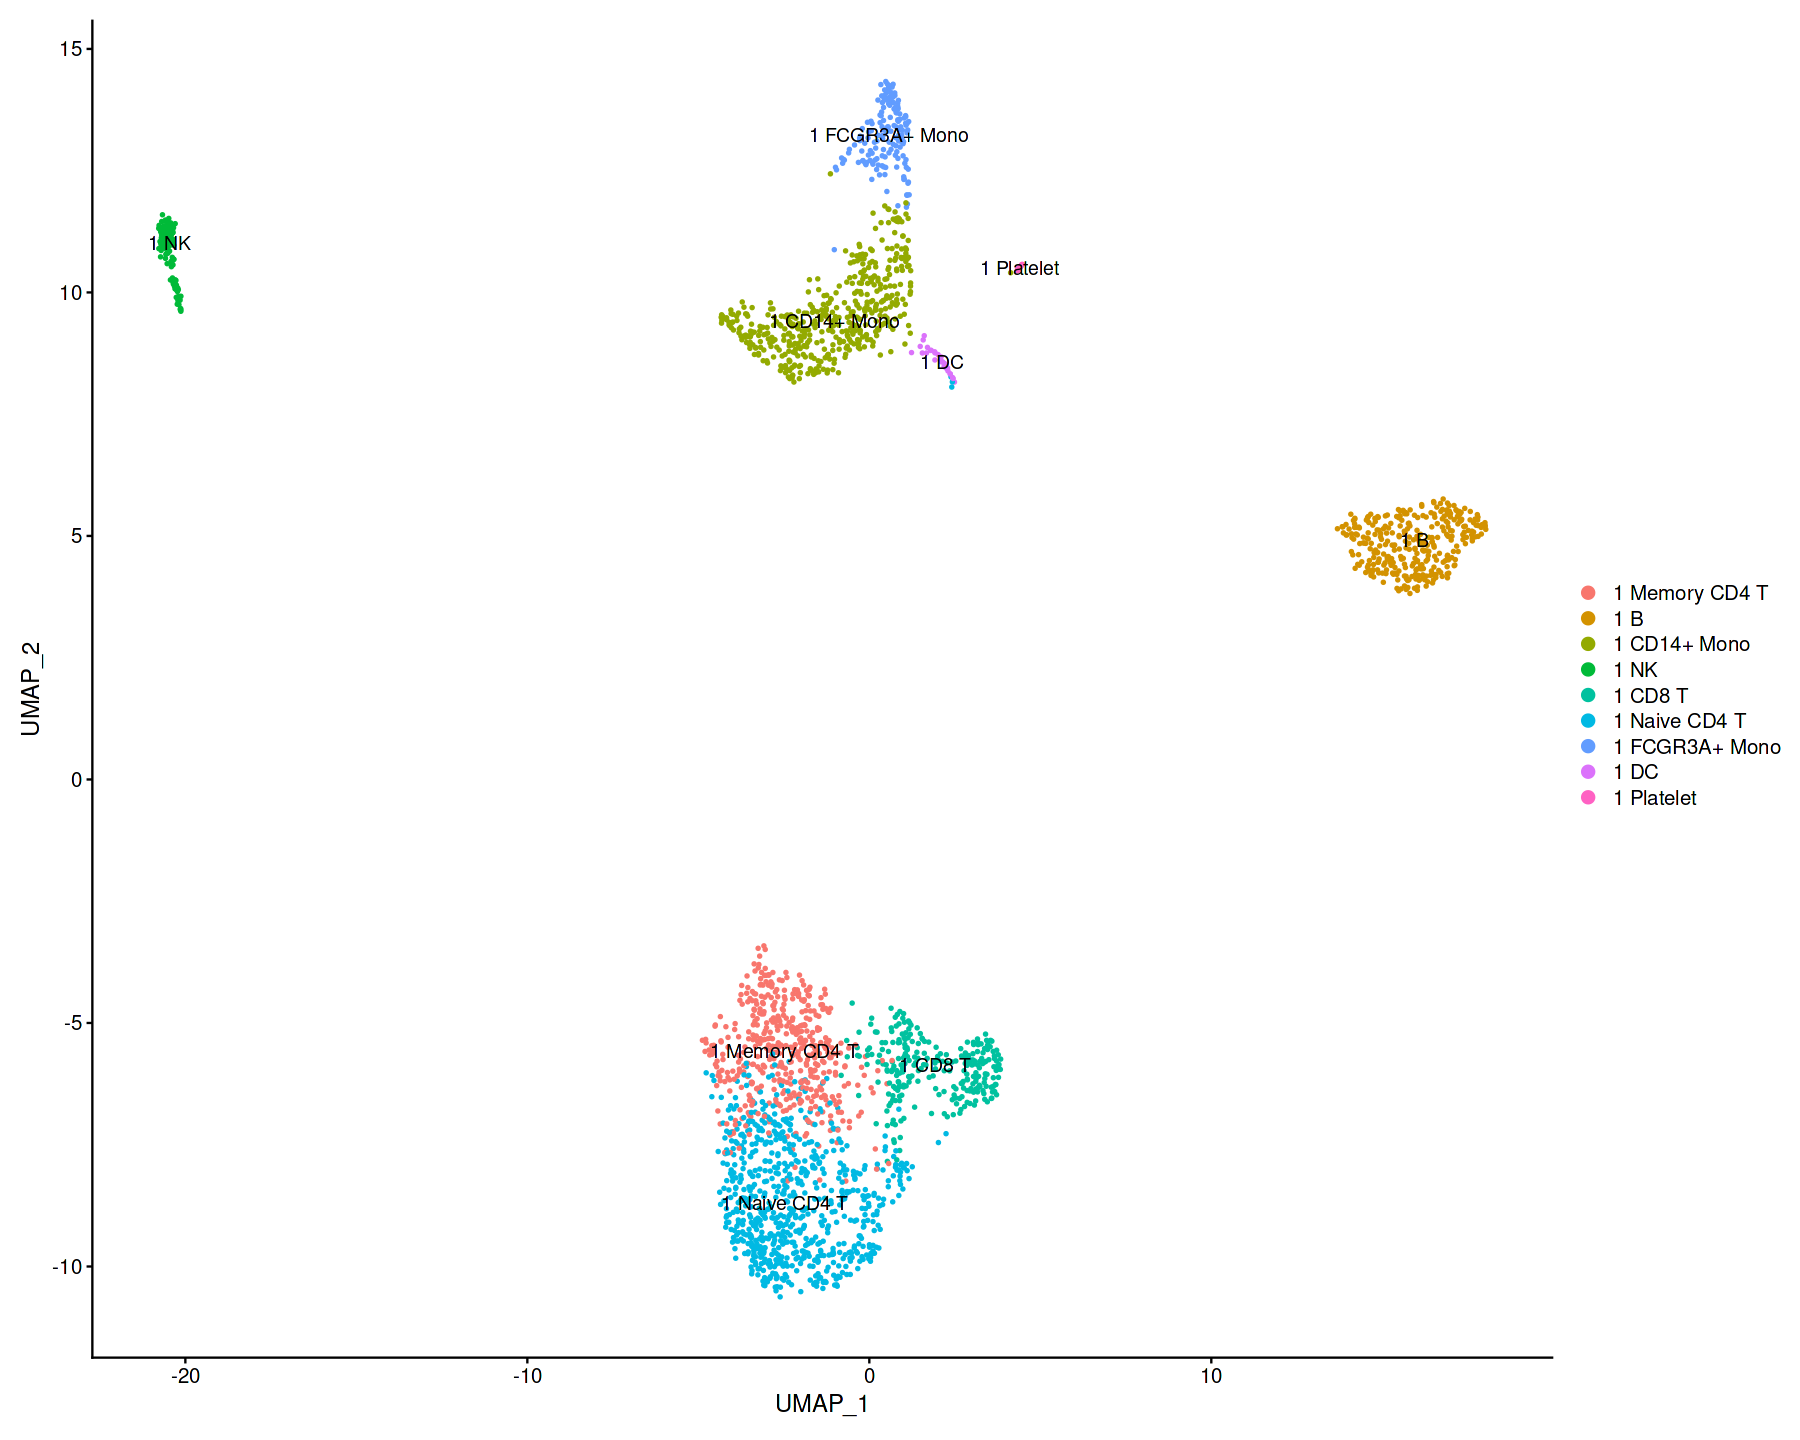

In [29]:
Idents(pbmc_max_change_attack) = "auto_annotation"
DimPlot(pbmc_max_change_attack, reduction = "umap", label = TRUE, pt.size = 0.5)